# **Hitarth Sharma**
# **The Spark Foundation GRIPFEB2021**
# **Task-3 : Exploratory Data Analysis - Retail**
### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ 


## Importing necessary libraries:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the dataset:

In [5]:
data=pd.read_csv("C:/Users/user/Documents/GRIP_Tasks/SampleSuperstore.csv")

In [6]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
data.shape

(9994, 13)

there are 9994 rows and 13 columns in this dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


we can see that there are 9994 non-null values in every column of this data and
we also know that there are 9994 rows in this dataset 
**that is there is no null values in this datatset.**

In [9]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


as there is no use of this column 'Postal Code' in our data analysis so we will drop it.

In [10]:
data1=data.drop(columns=['Postal Code'],axis=1)
data1.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
data1['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

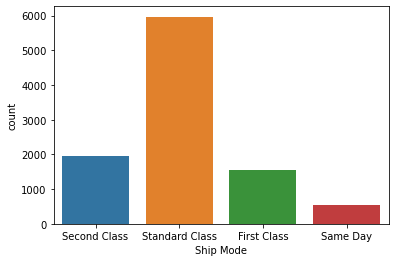

In [12]:
sns.countplot(x='Ship Mode',data=data1)
plt.show()

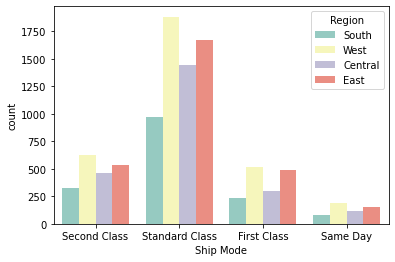

In [13]:
sns.countplot(x='Ship Mode',data=data1,hue='Region',palette='Set3')
plt.show()

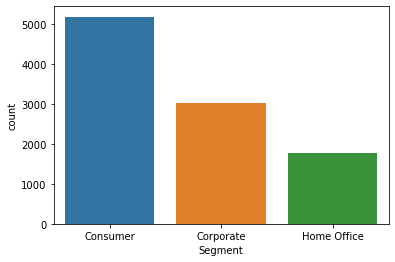

In [14]:
sns.countplot(x='Segment',data=data1)
plt.show()

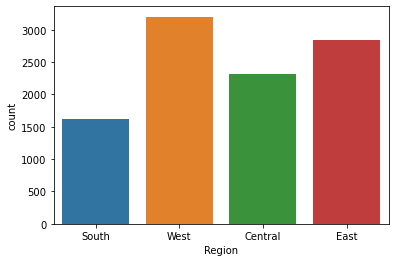

In [15]:
sns.countplot(x='Region',data=data1)
plt.show()

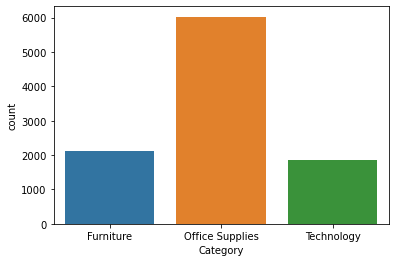

In [16]:
sns.countplot(x='Category',data=data1)
plt.show()

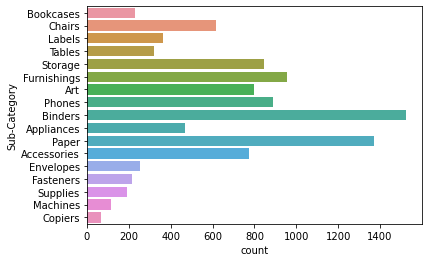

In [17]:
sns.countplot(y='Sub-Category',data=data1)
plt.show()

In [18]:
data1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


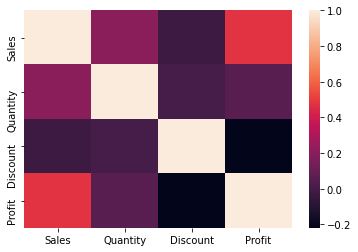

In [19]:
sns.heatmap(data1.corr())
plt.show()

We can see that there is a positive correlation between Sales and Profit
and a negative correlation between Discount and Profit.

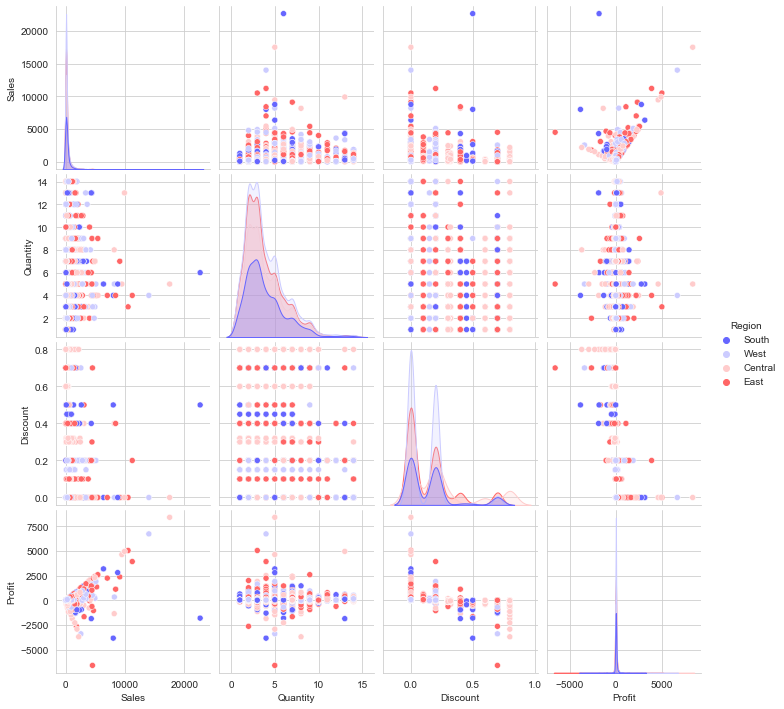

In [20]:
sns.set_style('whitegrid')
sns.pairplot(data1,hue='Region',palette='bwr')
plt.show()

### Now we will analyze the data of sales and profit in different regions:

In [21]:
dr=data1.groupby(['Region']).sum()
dr

,Sales,Quantity,Discount,Profit
Region,,,,
Central,501239.8908,8780,558.34,39706.3625
East,678781.2400,10618,414.00,91522.7800
South,391721.9050,6209,238.55,46749.4303
West,725457.8245,12266,350.20,108418.4489


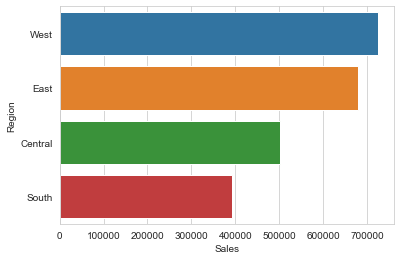

In [24]:
dr1=dr.sort_values(['Sales'],ascending=False)
sns.barplot(x='Sales',y=dr1.index,data=dr1)
plt.show()

we can see that highest sales are in west region and lowest are in south region.

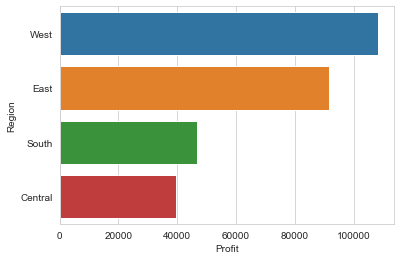

In [25]:
dr2=dr.sort_values(['Profit'],ascending=False)
sns.barplot(x='Profit',y=dr2.index,data=dr2)
plt.show()

highest profit is in west region and lowest is in central

### Now we will analyze the data of sales and profit in different states:

In [26]:
ds=data1.groupby(['State']).sum()
ds.head()

,Sales,Quantity,Discount,Profit
State,,,,
Alabama,19510.6400,256,0.0,5786.8253
Arizona,35282.0010,862,68.0,-3427.9246
Arkansas,11678.1300,240,0.0,4008.6871
California,457687.6315,7667,145.6,76381.3871
Colorado,32108.1180,693,57.6,-6527.8579


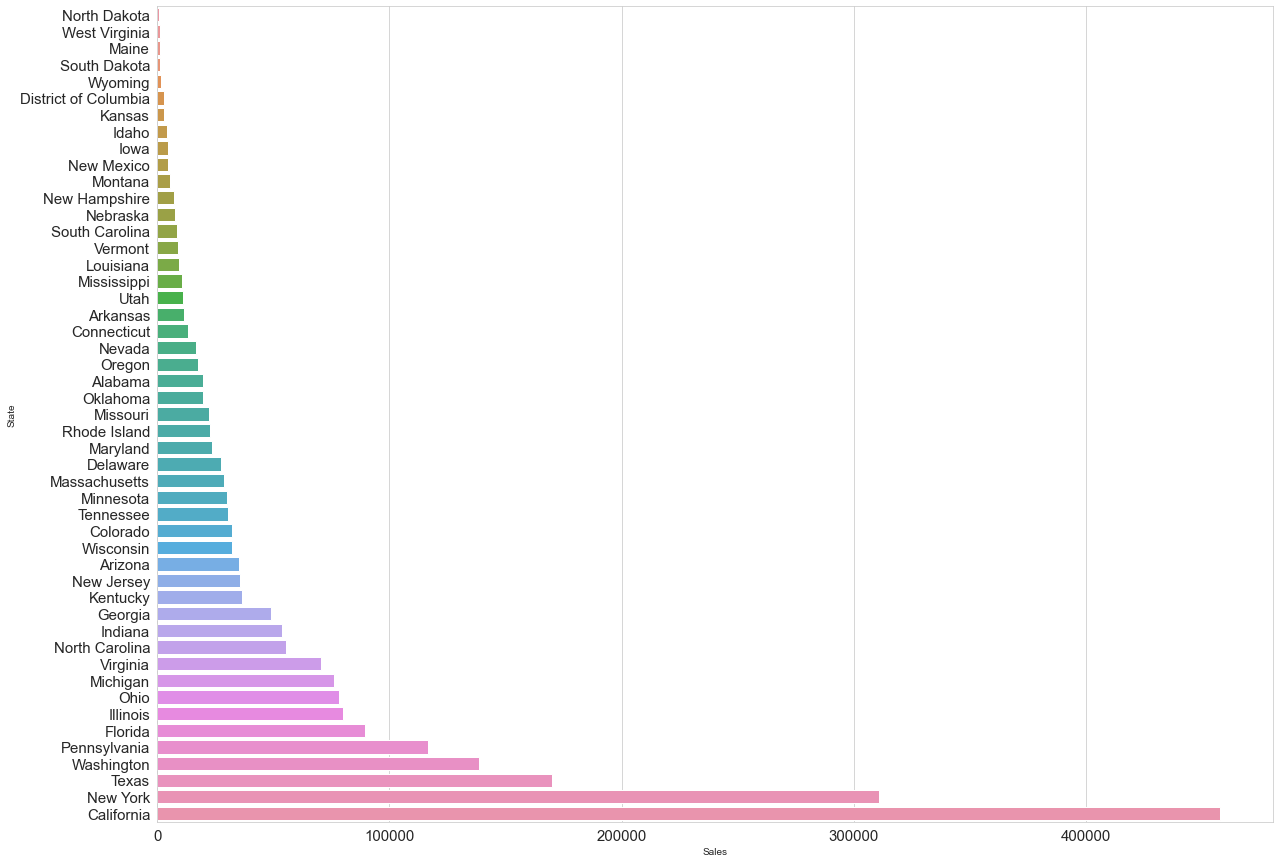

In [27]:
ds1=ds.sort_values(['Sales'],ascending=True)
plt.figure(figsize=(20,15))
plt.xticks(size=15)
plt.yticks(size=15)
sns.barplot(x='Sales',y=ds1.index,data=ds1)
plt.show()

We can see that California,New York and Texas are states with higher sales and North Dakota West Verginia with lower sales

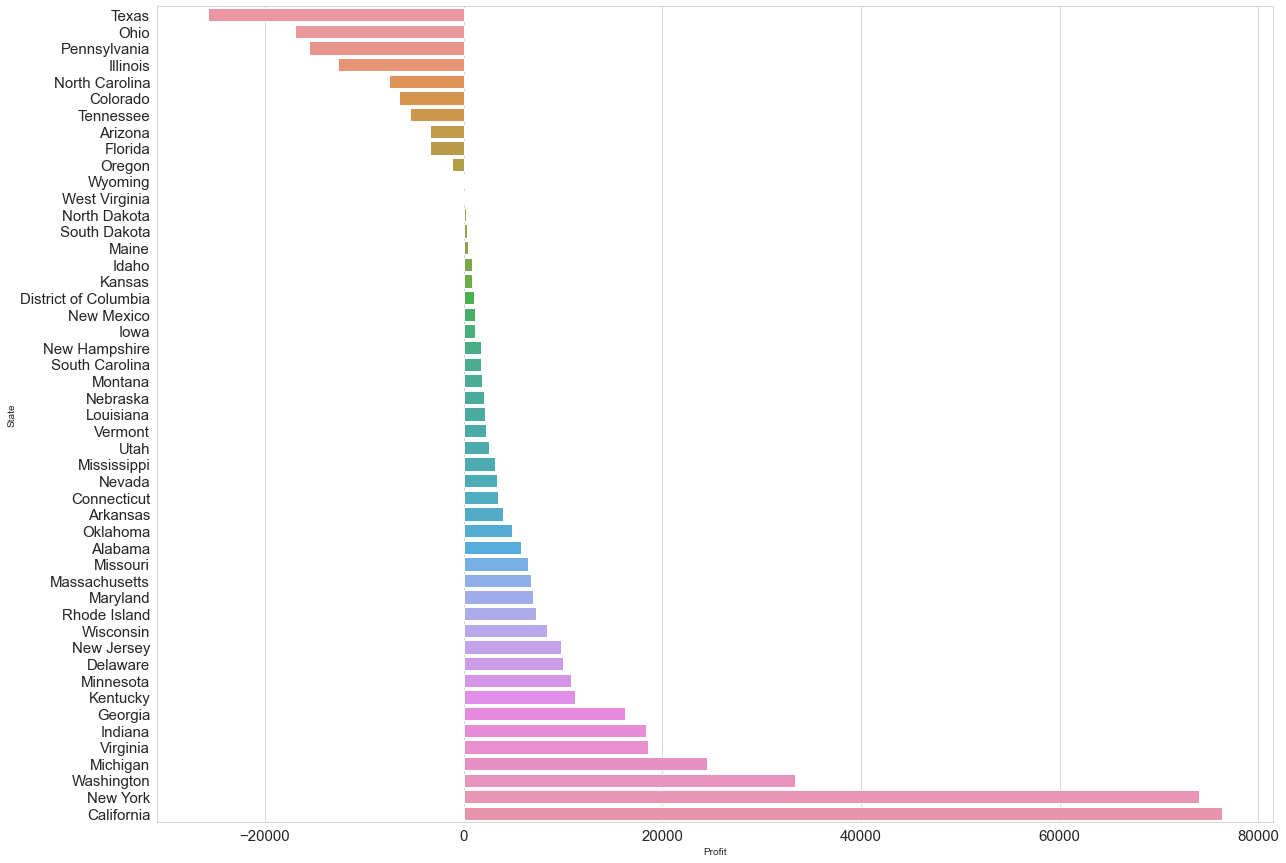

In [28]:
ds2=ds.sort_values(['Profit'],ascending=True)
plt.figure(figsize=(20,15))
plt.xticks(size=15)
plt.yticks(size=15)
sns.barplot(x='Profit',y=ds2.index,data=ds2)
plt.show()

we can see that Texas, Ohio, Pennsylvania, Illinois, North Carolina,
       Colorado, Tennessee, Arizona, Florida,and Oregon are the states with negative profit.
       and California, New York, Washington, and Michigan are the states with higher profit.

### Analysis of Sales and Profit in different categories: 

In [29]:
dc=data1.groupby(['Category']).sum()
dc

,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,741999.7953,8028,368.89,18451.2728
Office Supplies,719047.0320,22906,947.80,122490.8008
Technology,836154.0330,6939,244.40,145454.9481


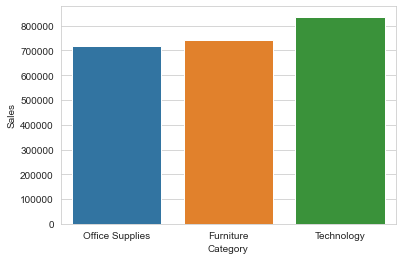

In [30]:
dc1=dc.sort_values(['Sales'],ascending=True)
sns.barplot(x=dc1.index,y='Sales',data=dc1)
plt.show()

Sales are higher in Technology and Furniture categories and are lower in Office Suppliers category

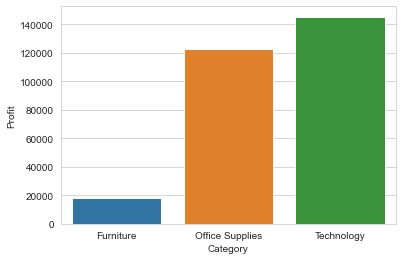

In [31]:
dc2=dc.sort_values(['Profit'],ascending=True)
sns.barplot(x=dc2.index,y='Profit',data=dc2)
plt.show()

We can see that Furniture is the category with lowest profit and Technology with highest profit.

### Analysis of Sales and Profit in different sub-categories: 

In [32]:
dsc=data1.groupby(['Sub-Category']).sum()
dsc

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Accessories,167380.3180,2976,60.80,41936.6357
Appliances,107532.1610,1729,77.60,18138.0054
Art,27118.7920,3000,59.60,6527.7870
Binders,203412.7330,5974,567.00,30221.7633
Bookcases,114879.9963,868,48.14,-3472.5560
Chairs,328449.1030,2356,105.00,26590.1663
Copiers,149528.0300,234,11.00,55617.8249
Envelopes,16476.4020,906,20.40,6964.1767
Fasteners,3024.2800,914,17.80,949.5182


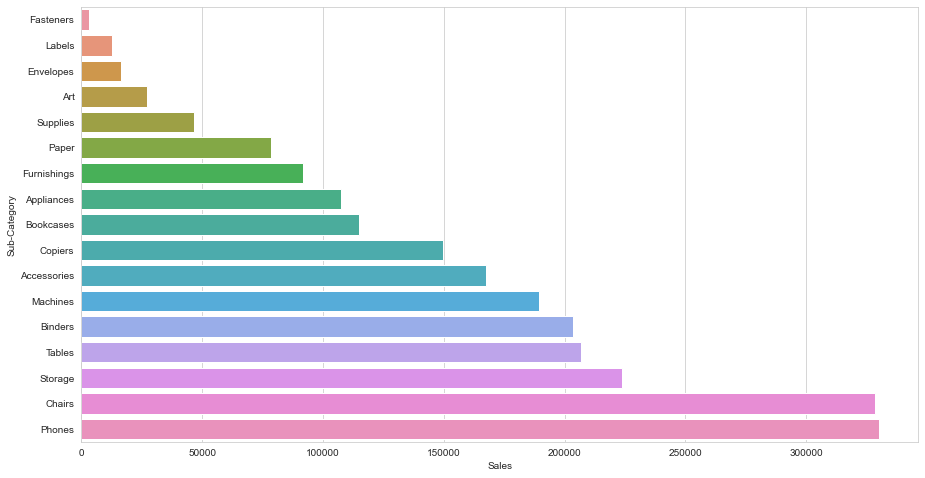

In [33]:
dsc1=dsc.sort_values(['Sales'],ascending=True)
plt.figure(figsize=(15,8))
plt.xticks(size=10)
plt.yticks(size=10)
sns.barplot(x='Sales',y=dsc1.index,data=dsc1)
plt.show()

Phones,Chairs and Storage are sub-categories with higher sales and Fasteners,Labels and Envelopes with lower sales.

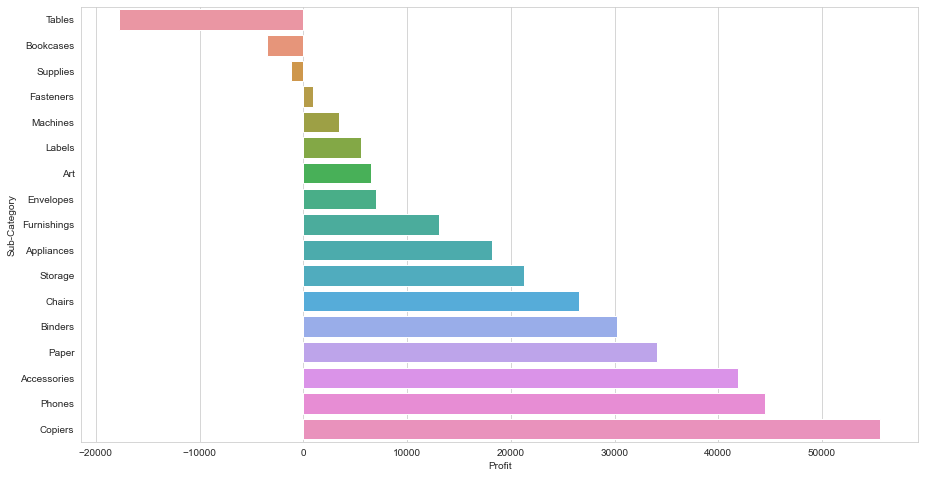

In [35]:
dsc2=dsc.sort_values(['Profit'],ascending=True)
plt.figure(figsize=(15,8))
plt.xticks(size=10)
plt.yticks(size=10)
sns.barplot(x='Profit',y=dsc2.index,data=dsc2)
plt.show()

We can see that Copies Phones and Accessories are sub-categories with higher profit and Tables, Bookcases and Supplies with lower profit.

# Thank you.